In [70]:
! git clone https://github.com/Vova2808/Spotify_Tracks_Dataset.git

fatal: destination path 'Spotify_Tracks_Dataset' already exists and is not an empty directory.


In [71]:
! pip install catboost

In [72]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Spotify_Tracks_Dataset/dataset.csv')

In [73]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

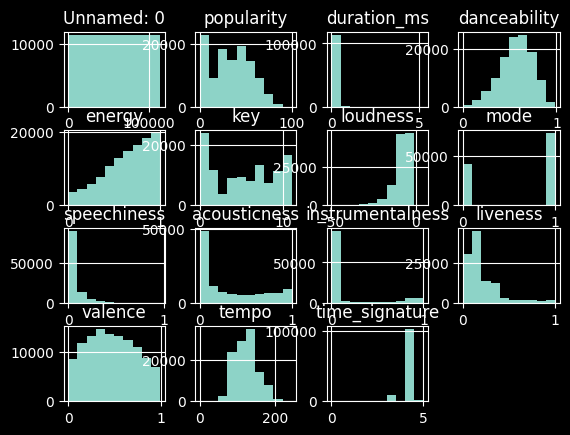

In [75]:
df.hist()

In [76]:
df['artists'].value_counts().head(30)

artists
The Beatles              279
George Jones             271
Stevie Wonder            236
Linkin Park              224
Ella Fitzgerald          222
Prateek Kuhad            217
Feid                     202
Chuck Berry              190
Håkan Hellström          183
OneRepublic              181
The Beach Boys           176
my little airport        171
Elvis Presley            169
Charlie Brown Jr.        169
Red Hot Chili Peppers    159
Bryan Adams              157
Scooter                  155
Daddy Yankee             154
Arctic Monkeys           152
BTS                      151
Norah Jones              150
The Prophet              145
Hank Williams            140
Glee Cast                139
Don Omar                 137
Vybz Kartel              128
Los Prisioneros          126
CoComelon                122
Anupam Roy               121
Seiko Matsuda            118
Name: count, dtype: int64

In [77]:
from catboost import CatBoostRegressor

In [78]:
from sklearn.model_selection import train_test_split

df[cat_features] = df[cat_features].fillna('missing')
df = df.fillna(0)

train, test = train_test_split(df, train_size=0.6, random_state=42)
val, test = train_test_split(test, train_size=0.5, random_state=42)

In [79]:
len(train) / len(df)

0.6

In [80]:
len(df)

114000

In [81]:
len(train)

68400

In [82]:
len(test)

22800

In [83]:
len(val)

22800

In [84]:
train.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68400 entries, 103465 to 15795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        68400 non-null  int64  
 1   track_id          68400 non-null  object 
 2   artists           68400 non-null  object 
 3   album_name        68400 non-null  object 
 4   track_name        68400 non-null  object 
 5   popularity        68400 non-null  int64  
 6   duration_ms       68400 non-null  int64  
 7   explicit          68400 non-null  bool   
 8   danceability      68400 non-null  float64
 9   energy            68400 non-null  float64
 10  key               68400 non-null  int64  
 11  loudness          68400 non-null  float64
 12  mode              68400 non-null  int64  
 13  speechiness       68400 non-null  float64
 14  acousticness      68400 non-null  float64
 15  instrumentalness  68400 non-null  float64
 16  liveness          68400 non-null  float6

In [86]:
X = ['album_name', 'track_name', 'popularity', 'duration_ms', 'explicit',
     'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
     'time_signature', 'track_genre']

cat_features = ['album_name', 'track_name', 'track_genre']

y = 'popularity'

In [87]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'random_seed': 42,
              'verbose': 100}

In [88]:
model = CatBoostRegressor(**parameters)

In [89]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

Learning rate set to 0.098855
0:	learn: 5.3420844	test: 5.3485638	best: 5.3485638 (0)	total: 186ms	remaining: 3m 5s
100:	learn: 0.0177227	test: 0.0171649	best: 0.0171649 (100)	total: 20.5s	remaining: 3m 2s
200:	learn: 0.0110349	test: 0.0105889	best: 0.0105889 (200)	total: 35.8s	remaining: 2m 22s
300:	learn: 0.0067450	test: 0.0065237	best: 0.0065199 (299)	total: 43.3s	remaining: 1m 40s
400:	learn: 0.0042758	test: 0.0040908	best: 0.0040908 (400)	total: 52.2s	remaining: 1m 17s
500:	learn: 0.0030780	test: 0.0029557	best: 0.0029557 (500)	total: 1m	remaining: 60s
600:	learn: 0.0022172	test: 0.0021385	best: 0.0021385 (600)	total: 1m 8s	remaining: 45.6s
700:	learn: 0.0017218	test: 0.0016615	best: 0.0016615 (700)	total: 1m 17s	remaining: 33s
800:	learn: 0.0013618	test: 0.0013300	best: 0.0013300 (800)	total: 1m 24s	remaining: 20.9s
900:	learn: 0.0011654	test: 0.0011541	best: 0.0011541 (900)	total: 1m 32s	remaining: 10.2s
999:	learn: 0.0010186	test: 0.0010116	best: 0.0010107 (997)	total: 1m 40s	r

In [90]:
model.predict(test[X])
model.predict(train[X])
model.predict(val[X])

array([19.00103262, 44.00179602, 25.99501421, ..., 44.00390149,
       20.995602  , 48.99573407])

In [91]:
test['popularity_pred'] = model.predict(test[X])

In [92]:
test['error_abs'] = abs(test['popularity'] - test['popularity_pred'])
test['error'] = test['popularity'] - test['popularity_pred']

In [93]:
test

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_pred,error_abs,error
54873,54873,76S5vWEejHLovf4ZBmedJC,Kelpe,Fourth: The Golden Eagle Remixed,Puds - Morgan Hislop Remix,11,214459,False,0.4030,0.88000,...,0.023700,0.459000,0.3140,0.4350,137.060,3,idm,10.996164,0.003836,0.003836
27539,27539,47M4azc9DmMfEM8TlyY99B,Culture Shock,Have It All / Pandemic,Pandemic,18,278291,False,0.4620,0.96600,...,0.000205,0.773000,0.1410,0.1630,173.980,4,drum-and-bass,18.004063,0.004063,-0.004063
49452,49452,0zolxiS5uiL5towOJrsJi4,Headhunterz,Home,Home,52,234165,False,0.5520,0.82900,...,0.187000,0.000054,0.2830,0.3670,150.039,4,hardstyle,52.002128,0.002128,-0.002128
103029,103029,0mhMSxIx2XnXCF7PDLjUGG,Ty Dolla $ign;Lil Wayne;The-Dream,Rap Ice,Love U Better,0,181872,False,0.6270,0.56200,...,0.062800,0.000000,0.3100,0.3890,95.054,4,soul,0.007477,0.007477,-0.007477
92409,92409,18YPNs20cBfgqkY8YCJlOH,Neil Sedaka,Rock with Sedaka (Expanded Edition),You Mean Everything to Me,52,157866,False,0.3740,0.42900,...,0.523000,0.000000,0.1340,0.6790,71.519,4,rockabilly,51.989654,0.010346,0.010346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5365,5365,27kGlAZVLGtgbWSuCbxXge,Yoshihisa Hirano,TVアニメ「HUNTER×HUNTER」オリジナル・サウンドトラック,奇術師のバイレ,51,66946,False,0.7340,0.72400,...,0.679000,0.842000,0.2580,0.8500,116.982,3,anime,50.998649,0.001351,0.001351
101638,101638,0D3I0yg402htc6JN6AQSII,Baby Sleep Music;Baby Lullaby;Monarch Baby Lul...,Baby Sleep Music: Soothing Baby Lullaby Music ...,Soothing Baby Lullabies,34,139371,False,0.0934,0.00954,...,0.994000,0.970000,0.0832,0.0427,166.642,3,sleep,33.994192,0.005808,0.005808
36953,36953,6yGNvSOyCZvNOCtHs3hfrH,Catching Flies,GLY,GLY,59,220623,False,0.6690,0.56300,...,0.250000,0.917000,0.1420,0.3940,119.974,4,french,59.009751,0.009751,-0.009751
616,616,7pxbZ29k1LJXvOdd2e5Bdn,Us The Duo,Shotgun,Shotgun,45,174884,False,0.8060,0.26300,...,0.787000,0.000000,0.1820,0.8680,115.854,4,acoustic,45.001488,0.001488,-0.001488


array([[<Axes: title={'center': 'error'}>,
        <Axes: title={'center': 'error_abs'}>]], dtype=object)

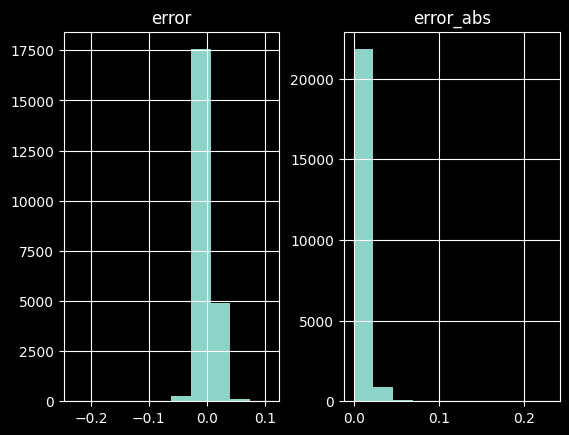

In [94]:
test[['error', 'error_abs']].hist()

In [95]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [96]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [97]:
error(test['popularity'],test['popularity_pred'])

0.007930823124953463
2599063177155.6143


In [98]:
test['error'].mean()

-0.00012462548454053845

MAE: 0.007817917902631045
MSE: 0.00012225037023735248
RMSE: 0.011056688936447135
R^2: 0.9999997558290028


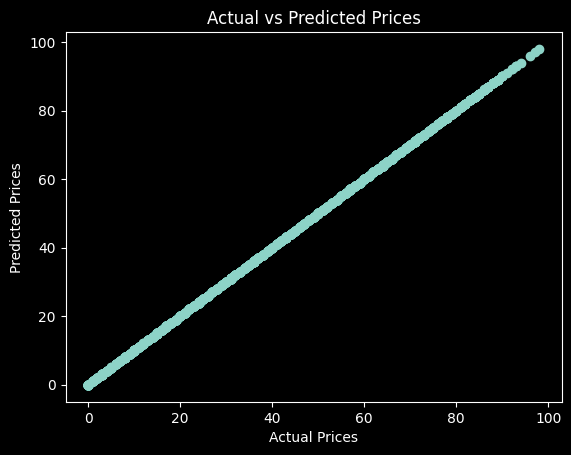

In [99]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(val[X])

y_true = val[y]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


plt.scatter(y_true, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

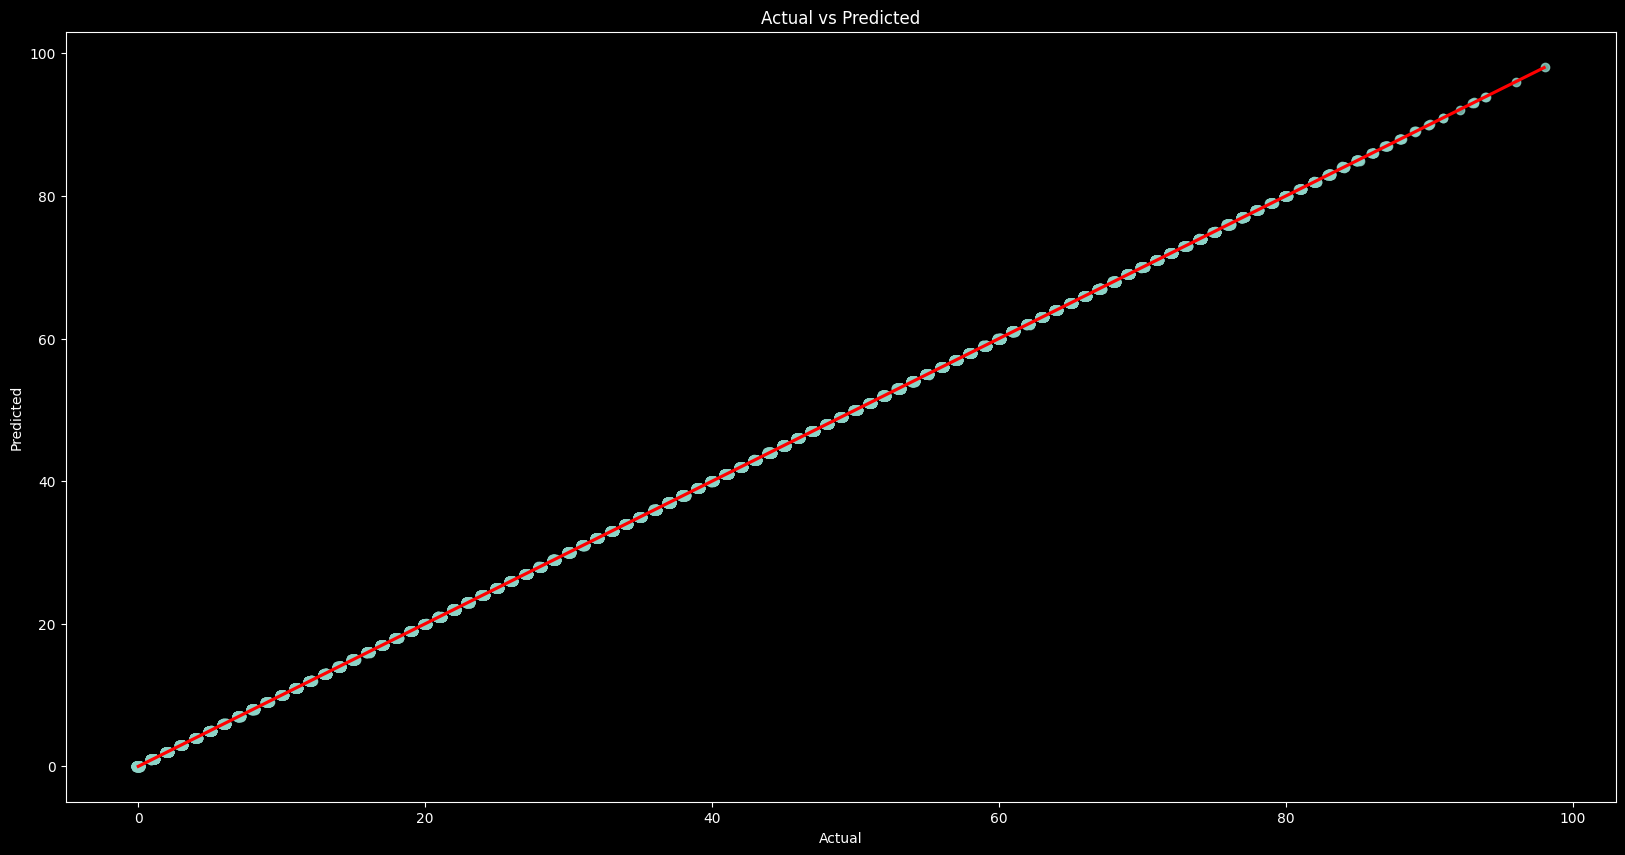

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
sns.regplot(data=df, x=test['popularity'], y=test['popularity_pred'], x_jitter=.15, line_kws=dict(color="r"),)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.ticklabel_format(style = 'plain')